# Logistic Regression

We want to learn about logistic regression as a method for Classification.Some examples of classification problems are:

1. Spam versus 'Ham' emails
2. Loan Default (yes/no)
3. Disease Diagnosis

Above all are examples of Binary classification (two classes)

1. So far we have only seen regression problems where we try to predict a continuous value (like price of the house)
2. Although the name may be continuous at first, logistic regression allows us to solve classification problems where we try to predict discrete categories.
3. The convention for binary classification is to have two classes 0 and 1 
4. We can't use a normal linear regression model on binary groups. It won't lead to a good fit.
5. Instead we can transform our linear regression to a logistic regression curve(goes between 0 and 1)
6. The sigmoid (aka logistic) function takes in any value and outputs it to be between 0 and 1
7. This means we can take our Linear Regression solution and place it into the Sigmoid function
8. This results in a probability from 0 and 1 of belonging in the 1 class
9. We can set cutoff point at 0.5, anython below it results in class 0, anything above is class 1.
10. After we train a logistic regression model on some training data, we will evaluate our model's performance on some test data.
11. We can use a confusion matrix to evaluate classification models. It is a table to describe the performance of classification models on a set of test data for which the true values are already known.
12. True Positive, FP, TN,FN, Accuracy, Error Rate, Type 1 and 2 errors

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [3]:
train=pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#now we do some exploratory data analysis
#now a lot of the times we are gonna have missing data, now what we are gonna do is use seaborn to create a simple heatmap to
#see where we are missing most of our data 

In [5]:
train.isnull()
#we basically get booleans of True and False

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

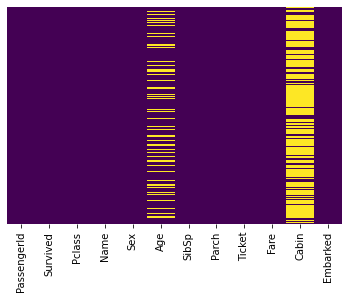

In [6]:
#we can create a heatmap of the above dataframe
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#every yellow dash point represents a true point i.e a null point. So, we can look at our data and see that we are missing some
#of age information and missing a lot of cabin information. Roughly, about 20 percent of that age data is missing and the 
#proportion of age missing is likely small enough for reasonable replacement with some form of imputation. Meaning, we can
#actually use the knowledge of the other columns to fill in reasonable values for that age column. Whereas, as far as 
#cabin column is concerned it looks like we are missing too much of the data to do something useful with it. We may drop it,
#or change it to another feature like cabin knows 1 or 0.

In [7]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

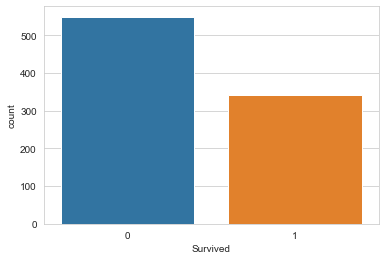

In [8]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

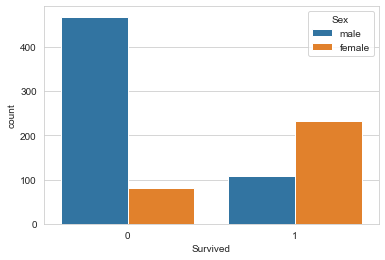

In [9]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

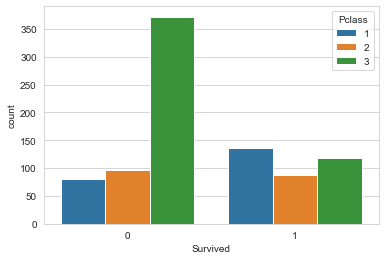

In [10]:
sns.countplot(x='Survived',data=train,hue='Pclass')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

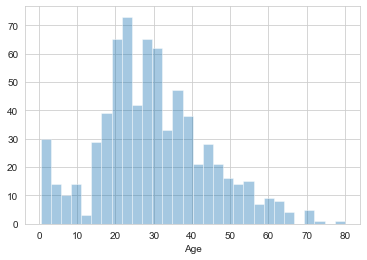

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

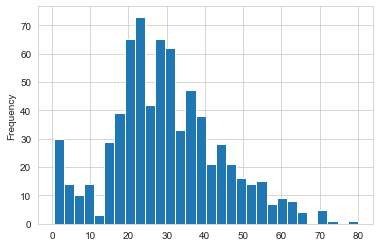

In [12]:
train['Age'].plot.hist(bins=30)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

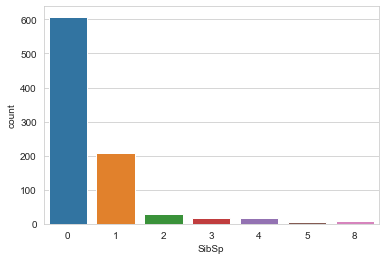

In [14]:
sns.countplot(train['SibSp'])

<AxesSubplot:>

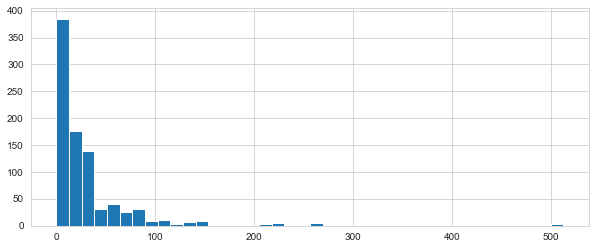

In [15]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [16]:
import cufflinks as cf

In [17]:
cf.go_offline()

In [18]:
train['Fare'].iplot(kind='hist',bins=50)

# Part 2

In [25]:
#We have done some exploratory data analysis. Now, we will switch gears to cleaning our data. Cleaning will allow us to 
#transform our data into an acceptable form for our machine learning algorithms.

In [26]:
#we want to fill in missing age entries instead of just dropping them all off.
#one way to do this is by filling in the mean age of all the passengers. This is known as imputation.
#however, we can be a step smarter and check the average age by the passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

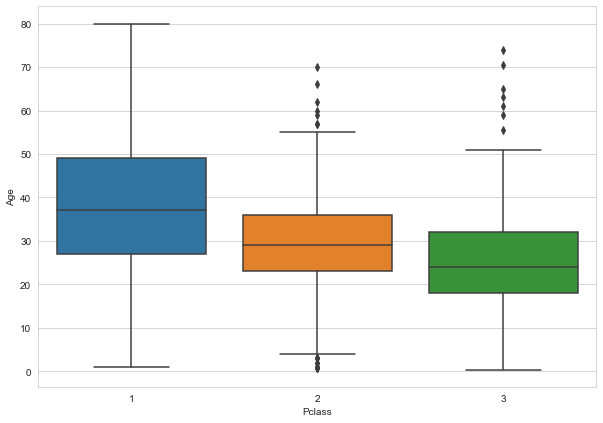

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [29]:
#we can use the average age to impute the age based off the passenger class.
#We could have created an entire model to try to predict age based off of all the features but we will use the simple above avg
#imputation.

In [20]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [21]:
train[['Age','Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [22]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

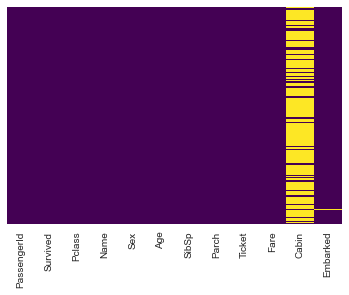

In [23]:
#now we check the heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#now we dont have any missing age values. We made reasonable guesses based of the passenger class

In [36]:
#now the issue is cabin column. But there are too many missing values in order to do something with it.
#what we can do is create a new feature such that do we know the cabin 0 or 1. But we will go ahead and drop this column

In [24]:
train.drop('Cabin',axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

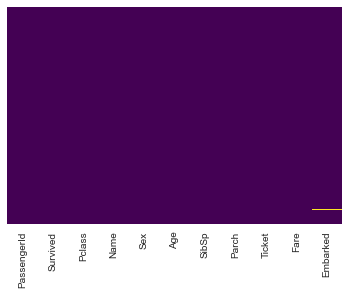

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
#now we have some null values in the Embarked column we will just go ahead and drop the remaining null values
train.dropna(inplace=True)

<AxesSubplot:>

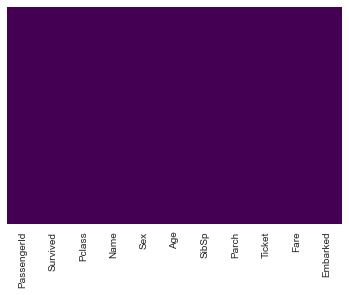

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#nothing is missing now

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [43]:
#now we have done the 1st step of cleaning data which is dealing with missing values. We filled and dropped the missing values
#now we have to deal with categorical features. We will need to convert categorical features into what is knwown as dummy
#variable using pandas. Otherwise, our machine learning algorithm won't be able to directly take in those features as inputs
#For example, if we take a look at sex column we have male or female. A machine learning algorithm won't be able to take in the
#string of the features. We will have to create a new column indicating 0 or 1 value for sex. We will do the same for embarked 
#column.

In [30]:
#we can use get_dummies method
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [32]:
#In above example one column is the perfect predictor of the other column (multi co-linearity)
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [34]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [35]:
#S is the perfect predictor of C
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [36]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [37]:
train=pd.concat([train,sex,embark],axis=1)

In [38]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [41]:
#since we got the dummy variables we dont need the sex and embarked column. We won't be able to use ticket or name column as
#there is no such information that we can use. So we drop all those columns we are not gonna use
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [42]:
train.head()
#All the data is numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [43]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [45]:
#Passenger id is numerical but it is of no use to is since it is essentially just an index so we drop it
train.drop('PassengerId',axis=1,inplace=True)

In [46]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [48]:
pd.get_dummies(train['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


# Part 3

In [49]:
df=pd.read_csv('titanic_test.csv')
df.head()
#we can clean this data and use it as test data but we will use train dataset entirely for training and testing dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [54]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel=LogisticRegression(solver='lbfgs',max_iter=1000)

In [61]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [62]:
predictions=logmodel.predict(X_test)

In [63]:
#now we evaluate our model. For classification tasks, scikit learn has a learn nice classification report we can use

In [64]:
from sklearn.metrics import classification_report
#classification report will basically tell us the precision, recall value, accuracy, f1 score etc.

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)

# Project 

In [68]:
ad=pd.read_csv('advertising.csv')

In [69]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [70]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [71]:
ad.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

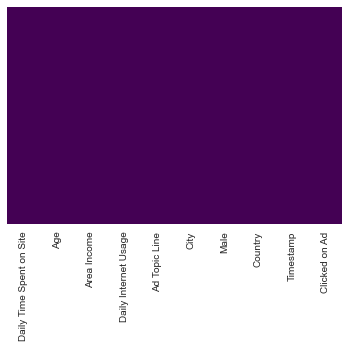

In [73]:
sns.heatmap(ad.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [74]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:ylabel='Frequency'>

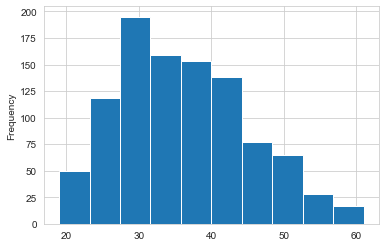

In [75]:
ad['Age'].plot.hist()

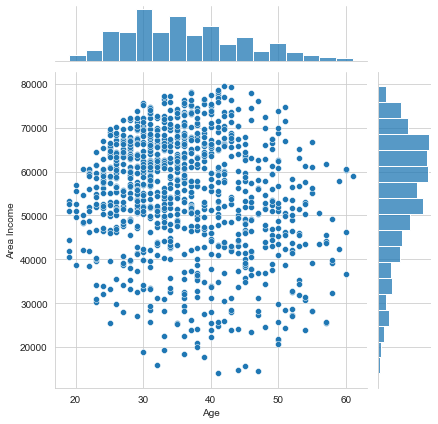

In [76]:
sns.jointplot(x='Age',y='Area Income',data=ad)

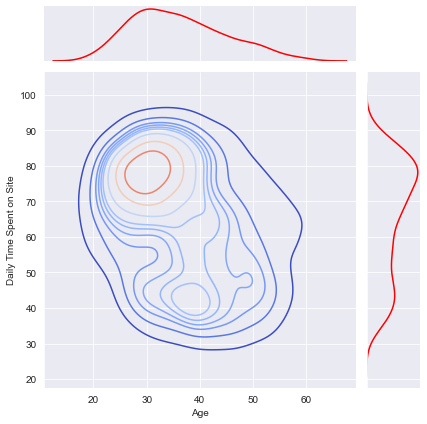

In [117]:
sns.set_style('darkgrid')
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad,kind='kde',cmap='coolwarm',color='red')

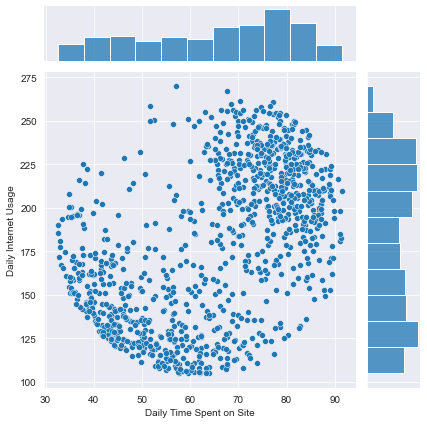

In [83]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad,cmap='coolwarm')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

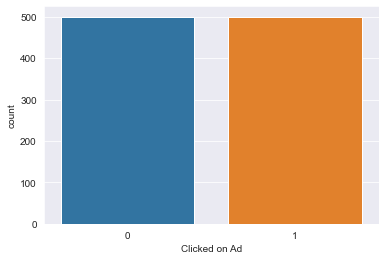

In [84]:
sns.countplot(ad['Clicked on Ad'])

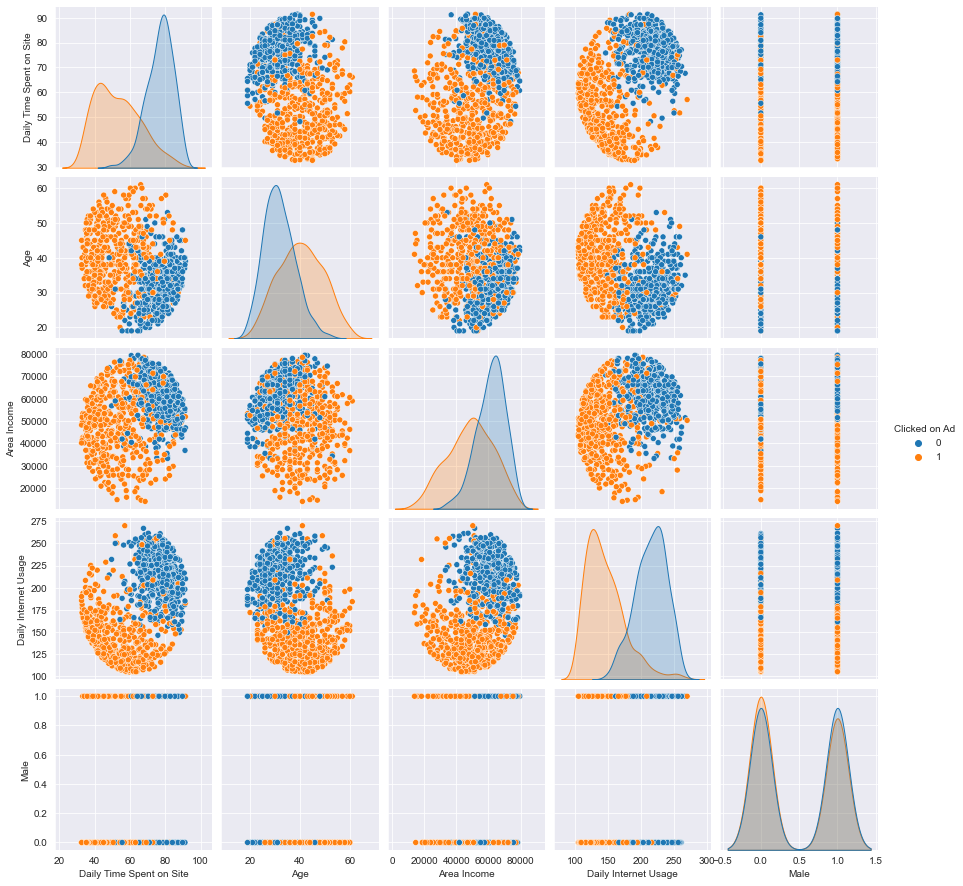

In [89]:
sns.pairplot(ad,hue='Clicked on Ad')

In [90]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [94]:
pd.get_dummies(ad['City']).head()

,Adamsbury,Adamside,Adamsstad,Alanview,Alexanderfurt,Alexanderview,Alexandrafort,Alexisland,Aliciatown,Alvaradoport,...,Wintersfort,Wongland,Wrightburgh,Wrightview,Yangside,Youngburgh,Youngfort,Yuton,Zacharystad,Zacharyton
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [95]:
a=pd.to_datetime(ad['Timestamp'])

In [97]:
time = a.iloc[2]
time.hour

20

In [98]:
ad['Hour']=a.apply(lambda timeStamp:timeStamp.hour)

In [99]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Hour', ylabel='count'>

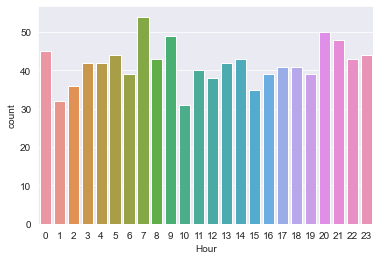

In [103]:
sns.countplot(ad['Hour'])

In [100]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Hour'],
      dtype='object')

In [104]:
X=ad[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Hour']]
X.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,1


In [102]:
y=ad['Clicked on Ad']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
log_model=LogisticRegression()

In [109]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [111]:
predictions=log_model.predict(X_test)

In [114]:
from sklearn.metrics import classification_report,confusion_matrix

In [113]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       158
           1       0.86      0.90      0.88       142

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [115]:
confusion_matrix(y_test,predictions)

array([[137,  21],
       [ 14, 128]], dtype=int64)